# Códigos importantes



## Tic Tac Toe

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from lib.agents import AlphaBetaAgent, HybridAgent, RandomAgent
from lib.tictactoe import Game

def simulateGames_freq(agent1, agent2, n=100):
    '''
    Recebe dois agentes e um numero n de simulações desejadas e
    devolve uma matriz com a frequência em que cada casa foi ocupada pelo
    vencedor
    '''
    board_size = 9
    victory_counts = np.zeros((board_size, board_size))

    # 🟩 Barra de progresso com tqdm
    for i in tqdm(range(n), desc="Simulando jogos", unit="jogo"):
        game = Game()
        game.currPlayer = 1 if i % 2 == 0 else -1  # alterna quem começa
        history = []

        while not game.isEnd():
            current_agent = agent1 if game.getCurrPlayer() == 1 else agent2
            move = current_agent.getAction(game)
            history.append((game.getCurrPlayer(), move))
            game.move(move)

        winner = game.getWinner()
        if winner != 0:
            for player, (r, c) in history:
                if player == winner:
                    victory_counts[r][c] += 1

    # 🔢 Calcula proporção de vitórias por casa
    victory_ratio = victory_counts / n

    # 📊 Impressão dos resultados
    return victory_ratio

def plot_heatmap(victory_ratio):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        victory_ratio,
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Proporção de vitórias'},
        square=True,
        linewidths=0.5,
        linecolor='gray'
    )
    plt.title("Heatmap das Casas Ocupadas pelo Jogador Vencedor")
    plt.xlabel("Colunas (0 a 8)")
    plt.ylabel("Linhas (0 a 8)")
    plt.tight_layout()
    plt.show()

## Análises


Simulando jogos:   0%|          | 0/100 [00:00<?, ?jogo/s]

Simulando jogos:   0%|          | 0/100 [00:00<?, ?jogo/s]

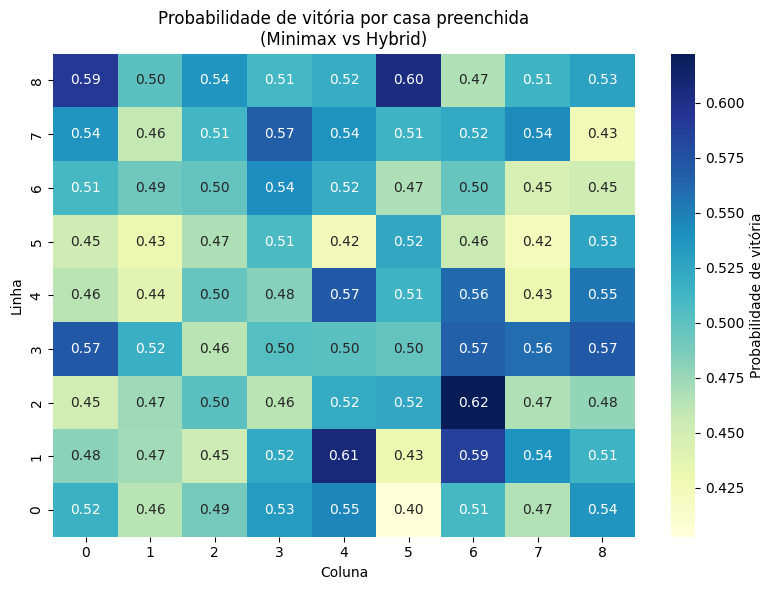

In [7]:

N = 100
agent1 = RandomAgent()
agent2 = RandomAgent()

win_count_by_position = np.zeros((9, 9))
fill_count_by_position = np.zeros((9, 9))

for _ in tqdm(range(N), desc="Simulando jogos", unit="jogo"):
    game = Game()
    first_move = game.getRandomMove()
    game.move(first_move)

    while not game.isEnd():
        current_agent = agent1 if game.getCurrPlayer() == 1 else agent2
        move = current_agent.getAction(game)
        game.move(move)

    winner = game.getWinner()
    if winner != 0:
        board = game.getBoard()
        for r in range(9):
            for c in range(9):
                if board[r][c] == winner:
                    win_count_by_position[r, c] += 1
                if board[r][c] != 0:
                    fill_count_by_position[r, c] += 1

# Calcular matriz de pro
for _ in tqdm(range(N), desc="Simulando jogos", unit="jogo"):
    game = Game()
    first_move = game.getRandomMove()
    game.move(first_move)

    while not game.isEnd():
        current_agent = agent1 if game.getCurrPlayer() == 1 else agent2
        move = current_agent.getAction(game)
        game.move(move)

    winner = game.getWinner()
    if winner != 0:
        board = game.getBoard()
        for r in range(9):
            for c in range(9):
                if board[r][c] == winner:
                    win_count_by_position[r, c] += 1
                if board[r][c] != 0:
                    fill_count_by_position[r, c] += 1
with np.errstate(divide='ignore', invalid='ignore'):
    win_probability_matrix = np.true_divide(win_count_by_position, fill_count_by_position)
    win_probability_matrix[np.isnan(win_probability_matrix)] = 0

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(win_probability_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probabilidade de vitória'})
plt.title("Probabilidade de vitória por casa preenchida\n(Minimax vs Hybrid)")
plt.xlabel("Coluna")
plt.ylabel("Linha")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [4]:
import tictactoe
from agents import AlphaBetaAgent, RandomAgent
import numpy as np
from tqdm import tqdm  # <-- barra de progresso

# Define os agentes
agent1 = RandomAgent()               # Player 1
agent2 = AlphaBetaAgent(depth=2)     # Player 2

# Parâmetros
n = 100
dim = 3
board_size = dim * dim
victory_counts = np.zeros((board_size, board_size))

def simulateGames(agent1, agent2, n=1000):
    global victory_counts
    wins1 = 0
    wins2 = 0

    for _ in tqdm(range(n), desc="Simulando jogos"):
        myGame = tictactoe.Game()
        myGame.currPlayer = 1  # Player 1 (agent1) começa
        history = []

        while myGame.getMoves() and not myGame.isEnd():
            move = agent1.getAction(myGame) if myGame.getNumMoves() % 2 == 0 else agent2.getAction(myGame)
            history.append((myGame.currPlayer, move))
            myGame.move(move)

        winner = myGame.getWinner()
        if winner == 1:
            wins1 += 1
        elif winner == -1:
            wins2 += 1

        for player, pos in history:
            if player == winner:
                victory_counts[pos[0], pos[1]] += 1

    print(f'\nRandom (P1) venceu {wins1} jogos, Minimax (P2) venceu {wins2} jogos, {n - wins1 - wins2} empates.')

simulateGames(agent1, agent2, n)

# Calcula proporções por casa
victory_ratio = victory_counts / n

# Salva os dados no formato pedido
with open("victory_heatmap.txt", "w") as f:
    for row in range(board_size):
        for col in range(board_size):
            casa_num = row * board_size + col + 1
            f.write(f"{casa_num}: {victory_ratio[row, col]:.4f}\n")

print("✅ Arquivo 'victory_heatmap.txt' criado com sucesso!")


Simulando jogos:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando jogos: 100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


Random (P1) venceu 7 jogos, Minimax (P2) venceu 91 jogos, 2 empates.
✅ Arquivo 'victory_heatmap.txt' criado com sucesso!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parâmetros do tabuleiro
dim = 3
board_size = dim * dim  # 9

# Carregar os dados do arquivo
data = np.zeros((board_size, board_size))

with open("victory_heatmap.txt", "r") as f:
    for line in f:
        casa, valor = line.strip().split(":")
        casa = int(casa) - 1
        row = casa // board_size
        col = casa % board_size
        data[row, col] = float(valor)

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={"label": "Proporção de vitórias"})
plt.title("Heatmap de Ocupação das Casas pelo Jogador Vencedor\n(Ultimate Tic Tac Toe - 1000 jogos)")
plt.xlabel("Colunas (1 a 9)")
plt.ylabel("Linhas (1 a 9)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from lib.agents import AlphaBetaAgent, RandomAgent
import lib.tictactoe

# Parâmetros
N_GAMES = 1000
DIM = 3
BOARD_SIZE = DIM * DIM  # 9x9
victory_counts = np.zeros((BOARD_SIZE, BOARD_SIZE))

# Agentes
minimax = AlphaBetaAgent(depth=2)
random_agent = RandomAgent()

def simulate_game(minimax_first=True):
    game = tictactoe.Game()
    game.currPlayer = 1 if minimax_first else -1
    history = []

    while not game.isEnd():
        if game.getCurrPlayer() == 1:
            move = minimax.getAction(game) if minimax_first else random_agent.getAction(game)
        else:
            move = random_agent.getAction(game) if minimax_first else minimax.getAction(game)
        history.append((game.getCurrPlayer(), move))
        game.move(move)

    winner = game.getWinner()
    # Verifica se o minimax venceu
    minimax_player = 1 if minimax_first else -1
    if winner == minimax_player:
        for player, pos in history:
            if player == winner:
                victory_counts[pos[0], pos[1]] += 1
    return winner == minimax_player

# Simulação com barra de progresso
minimax_wins = 0
for i in tqdm(range(N_GAMES), desc="Simulando vitórias do Minimax"):
    minimax_first = (i % 2 == 0)
    won = simulate_game(minimax_first)
    if won:
        minimax_wins += 1

# Calcula a frequência por casa (somente jogos ganhos pelo Minimax)
victory_ratio = victory_counts / minimax_wins if minimax_wins > 0 else victory_counts

# Salva em TXT
with open("victory_heatmap_minimax.txt", "w") as f:
    for row in range(BOARD_SIZE):
        for col in range(BOARD_SIZE):
            casa_num = row * BOARD_SIZE + col + 1
            f.write(f"{casa_num}: {victory_ratio[row, col]:.4f}\n")

# Gera Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(victory_ratio, annot=True, fmt=".3f", cmap="Greens", cbar_kws={'label': 'Frequência (vitórias do Minimax)'})
plt.title("Heatmap das Casas Ocupadas nas Vitórias do Minimax")
plt.xlabel("Colunas do Tabuleiro (1 a 9)")
plt.ylabel("Linhas do Tabuleiro (1 a 9)")
plt.tight_layout()
plt.savefig("victory_heatmap_minimax.png", dpi=300)
plt.show()

# Resultado
print(f"\n✅ Arquivo 'victory_heatmap_minimax.txt' e imagem 'victory_heatmap_minimax.png' gerados com sucesso!")
print(f"🏆 Total de vitórias do Minimax: {minimax_wins} de {N_GAMES} jogos ({100 * minimax_wins / N_GAMES:.1f}%)")
